In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
import datetime
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_dark"

pd.set_option("Display.max_columns", 60)

In [2]:
#Load Our World in Data Covid-19 Dataset
path = '/Users/oseadeleke/Documents/DS/Projects/COVID-19 Data Visualization Project/Datasets/owid-covid-data.csv'
df = pd.read_csv(path)

In [3]:
#Extract columns to be used in creating visualizations
data= df.loc[:,['iso_code', 'continent', 'location', 'date', 'total_tests', 'total_cases', 'total_deaths', 'icu_patients', 'hosp_patients', 'total_vaccinations', 'population']]
data.head()

,iso_code,continent,location,date,total_tests,total_cases,total_deaths,icu_patients,hosp_patients,total_vaccinations,population
0,AFG,Asia,Afghanistan,2020-02-24,NaN,1.0,NaN,NaN,NaN,NaN,38928341.0
1,AFG,Asia,Afghanistan,2020-02-25,NaN,1.0,NaN,NaN,NaN,NaN,38928341.0
2,AFG,Asia,Afghanistan,2020-02-26,NaN,1.0,NaN,NaN,NaN,NaN,38928341.0
3,AFG,Asia,Afghanistan,2020-02-27,NaN,1.0,NaN,NaN,NaN,NaN,38928341.0
4,AFG,Asia,Afghanistan,2020-02-28,NaN,1.0,NaN,NaN,NaN,NaN,38928341.0


In [4]:
#Create df that contains cases over the world
world=data.loc[data.location == 'World']
world.shape

(369, 11)

In [5]:
#Drop observations where location == World
data.drop(data[data.location == 'World'].index, inplace=True)

In [6]:
#Parse date column so python is able to recognize as dates
data['parsed_dates']= pd.to_datetime(data.date)
world['parsed_dates']= pd.to_datetime(world.date)

In [12]:
#Create line chart to show cases over the world since the beginning of the pandemic
fig = px.line(world, x="parsed_dates", y="total_cases", labels={'parsed_dates':'Date', 'total_cases':'Total Cases'},
              title="Worldwide Cases as of 2021-01-24")
fig.show()

In [13]:
#Create line chart to show deaths over the world since the beginning of the pandemic
fig = px.line(world, x="parsed_dates", y="total_deaths", labels={'parsed_dates':'Date', 'total_deaths':'Total Deaths'},
              title="Worldwide Deaths as of 2021-01-24")
fig.show()

Text(0, 0.5, 'Deaths')

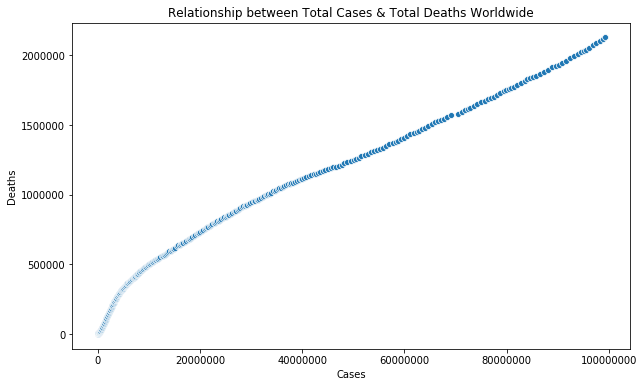

In [36]:
#Show relationship between Cases & Death in the world

fig, ax = plt.subplots(figsize=(10,6))
plt.title("Relationship between Total Cases & Total Deaths Worldwide")
plt.ticklabel_format(style='plain', useOffset=False)

sns.scatterplot(x='total_cases',y='total_deaths', data=world)
plt.xlabel("Cases")
plt.ylabel("Deaths")

In [14]:
#Create line chart to show total vaccinations over the world
fig = px.line(world, x="parsed_dates", y="total_vaccinations", labels={'parsed_dates':'Date', 'total_vaccinations':'Vaccinations'},
              title="Worldwide Vaccinations as of 2021-01-24")
fig.show()

In [17]:
#Show Total Cases by Continents
continent = data.loc[(data['parsed_dates'] == '2021-01-24')]
continent.head()

,iso_code,continent,location,date,total_tests,total_cases,total_deaths,icu_patients,hosp_patients,total_vaccinations,population,parsed_dates
335,AFG,Asia,Afghanistan,2021-01-24,NaN,54595.0,2378.0,NaN,NaN,NaN,38928341.0,2021-01-24
657,ALB,Europe,Albania,2021-01-24,NaN,72274.0,1315.0,NaN,NaN,NaN,2877800.0,2021-01-24
992,DZA,Africa,Algeria,2021-01-24,NaN,105596.0,2863.0,NaN,NaN,NaN,43851043.0,2021-01-24
1321,AND,Europe,Andorra,2021-01-24,NaN,9549.0,96.0,NaN,NaN,NaN,77265.0,2021-01-24
1632,AGO,Africa,Angola,2021-01-24,NaN,19399.0,459.0,NaN,NaN,NaN,32866268.0,2021-01-24


In [95]:
#Extract each continent from the dataframe
Asia= continent.loc[continent['continent'] == 'Asia']
Europe= continent.loc[continent['continent'] == 'Europe']
Africa= continent.loc[continent['continent'] == 'Africa']
North_America= continent.loc[continent['continent'] == 'North America']
South_America= continent.loc[continent['continent'] == 'South America']
Oceania= continent.loc[continent['continent'] == 'Oceania']

#Find total cases for each continent
asia_total_cases = Asia['total_cases'].sum()
europe_total_cases= Europe['total_cases'].sum()
africa_total_cases= Africa['total_cases'].sum()
NA_total_cases= North_America['total_cases'].sum()
SA_total_cases= South_America['total_cases'].sum()
oceania_total_cases= Oceania['total_cases'].sum()

#Find total deaths for each continent
asia_total_deaths = Asia['total_deaths'].sum()
europe_total_deaths= Europe['total_deaths'].sum()
africa_total_deaths= Africa['total_deaths'].sum()
NA_total_deaths= North_America['total_deaths'].sum()
SA_total_deaths= South_America['total_deaths'].sum()
oceania_total_deaths= Oceania['total_deaths'].sum()

#Create new dataframe with continents and total cases
continent_cases=pd.DataFrame({'continent':['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania'],
'Total Cases': [asia_total_cases, 
europe_total_cases, africa_total_cases, NA_total_cases, SA_total_cases, oceania_total_cases]
})

#Create new dataframe with continents and total deaths
continent_deaths=pd.DataFrame({'continent':['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania'],
'Total Deaths': [asia_total_deaths, 
europe_total_deaths, africa_total_deaths, NA_total_deaths, SA_total_deaths, oceania_total_deaths]
})

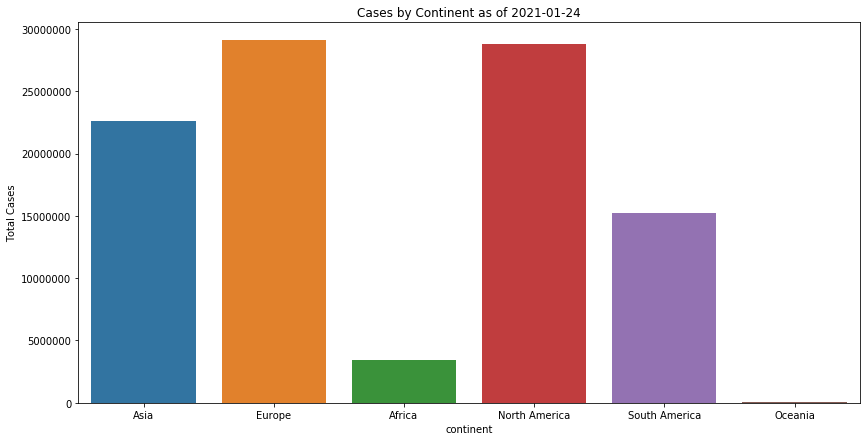

In [25]:
#Plot Total Cases by Continent
fig, ax = plt.subplots(figsize=(14,7))
plt.title("Cases by Continent as of 2021-01-24")
plt.ticklabel_format(style='plain')
sns.barplot('continent', 'Total Cases', data=continent_cases)

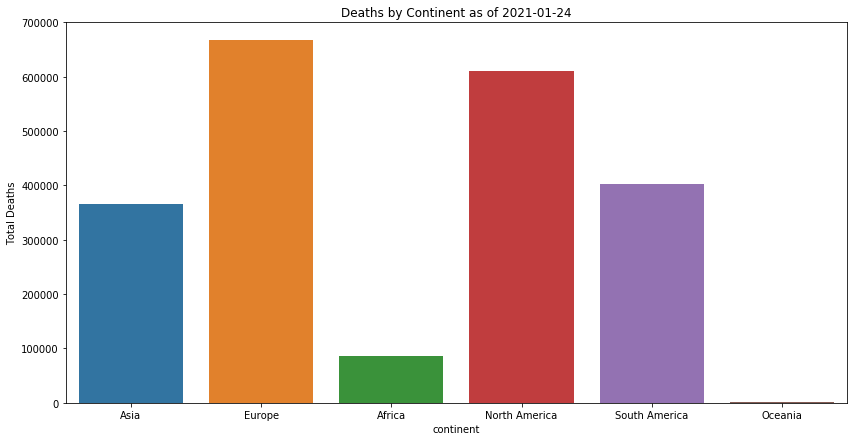

In [96]:
#Plot Total Deaths by Continent
fig, ax = plt.subplots(figsize=(14,7))
plt.title("Deaths by Continent as of 2021-01-24")
plt.ticklabel_format(style='plain')
sns.barplot('continent', 'Total Deaths', data=continent_deaths)

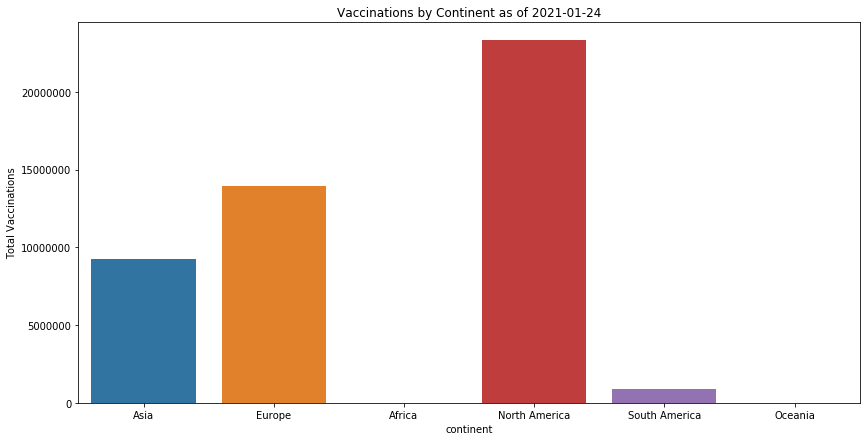

In [27]:
#Show Total Vaccinations by Continent

#Find Total Vaccinations by Continent
asia_total_vaccinations = Asia['total_vaccinations'].sum()
europe_total_vaccinations= Europe['total_vaccinations'].sum()
africa_total_vaccinations= Africa['total_vaccinations'].sum()
NA_total_vaccinations= North_America['total_vaccinations'].sum()
SA_total_vaccinations= South_America['total_vaccinations'].sum()
oceania_total_vaccinations= Oceania['total_vaccinations'].sum()

#Create new dataframe with continents and vaccinations
continent_vaccinations=pd.DataFrame({'continent':['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania'],
'Total Vaccinations': [asia_total_vaccinations, 
europe_total_vaccinations, africa_total_vaccinations, NA_total_vaccinations, SA_total_vaccinations, oceania_total_vaccinations]
})

#Plot Total Vaccinations by Continent
fig, ax = plt.subplots(figsize=(14,7))
plt.title("Vaccinations by Continent as of 2021-01-24")
plt.ticklabel_format(style='plain')
sns.barplot('continent', 'Total Vaccinations', data=continent_vaccinations)

In [37]:
#Use pandas melt function on North_America df
North_America_melt = pd.melt(North_America, id_vars='location', value_vars=['total_cases', 'total_deaths', 'total_vaccinations'])
North_America_melt.head()

,location,variable,value
0,Antigua and Barbuda,total_cases,198.0
1,Bahamas,total_cases,8101.0
2,Barbados,total_cases,1387.0
3,Belize,total_cases,11750.0
4,Canada,total_cases,752040.0


In [40]:
#Plot North American countries cases, deaths, vaccinations administered
fig = px.bar(North_America_melt,
             x='value', y='location', color='variable', barmode='group',
             title='Confirmed Cases/Deaths/Vaccinations in North America as of 2021-01-24', text='value', height=850)
fig.show()

In [39]:
#Use pandas melt function on DF for other continents
Asia_melt = pd.melt(Asia, id_vars='location', value_vars=['total_cases', 'total_deaths', 'total_vaccinations'])
Europe_melt = pd.melt(Europe, id_vars='location', value_vars=['total_cases', 'total_deaths', 'total_vaccinations'])
Africa_melt = pd.melt(Africa, id_vars='location', value_vars=['total_cases', 'total_deaths', 'total_vaccinations'])
South_America_melt = pd.melt(South_America, id_vars='location', value_vars=['total_cases', 'total_deaths', 'total_vaccinations'])
Oceania_melt = pd.melt(Oceania, id_vars='location', value_vars=['total_cases', 'total_deaths', 'total_vaccinations'])

In [42]:
#Plot Asian countries cases, deaths, vaccinations administered
fig = px.bar(Asia_melt,
             x='value', y='location', color='variable', barmode='group',
             title='Confirmed Cases/Deaths/Vaccinations in Asia as of 2021-01-24', text='value', height=1000)
fig.show()

In [48]:
#Plot European countries cases, deaths, vaccinations administered
fig = px.bar(Europe_melt,
             x='value', y='location', color='variable', barmode='group',
             title='Confirmed Cases/Deaths/Vaccinations in Europe as of 2021-01-24', text='value', height=1500)
fig.show()

In [75]:
#Plot African countries cases, deaths, vaccinations administered
fig = px.bar(Africa_melt,
             x='value', y='location', color='variable', barmode='group',
             title='Confirmed Cases/Deaths/Vaccinations in Africa as of 2021-01-24', text='value', height=1500)
fig.show()

In [76]:
#Plot South American countries cases, deaths, vaccinations administered
fig = px.bar(South_America_melt,
             x='value', y='location', color='variable', barmode='group',
             title='Confirmed Cases/Deaths/Vaccinations in South America as of 2021-01-24', text='value', height=700)
fig.show()

In [77]:
#Plot Ocenian countries cases, deaths, vaccinations administered
fig = px.bar(Oceania_melt,
             x='value', y='location', color='variable', barmode='group',
             title='Confirmed Cases/Deaths/Vaccinations in Ocenia as of 2021-01-24', text='value', height=500)
fig.show()

Text(0, 0.5, 'ICU Patients')

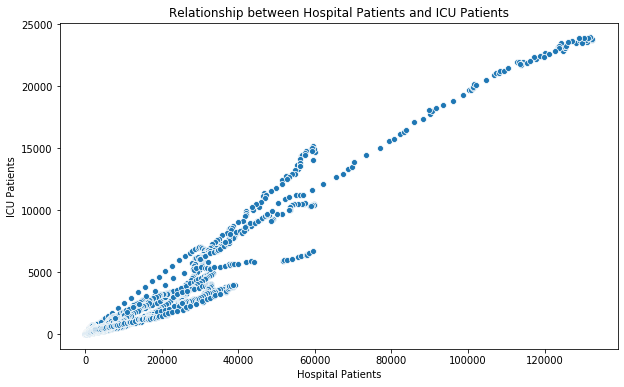

In [56]:
#Create Scatterplot to show relationship between Hospital Patients and ICU Patients
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Relationship between Hospital Patients and ICU Patients")
plt.ticklabel_format(style='Plain', useOffset=False)

sns.scatterplot(x='hosp_patients', y= 'icu_patients', data=data)
plt.xlabel("Hospital Patients")
plt.ylabel("ICU Patients")

In [74]:
#Create Static Choropleth map to show cases worldwide
fig = px.choropleth(continent, locations="location", 
                    locationmode='country names', color="total_cases", 
                    hover_name="location", hover_data=['total_cases', 'total_deaths', 'total_vaccinations'],
                    color_continuous_scale="peach", 
                    title='Cases Worldwide as of 2021-01-24')

fig.show()

In [78]:
#Create Static Choropleth map to show Vaccinations administered
fig = px.choropleth(continent, locations="location", 
                    locationmode='country names', color="total_vaccinations", 
                    hover_name="location", hover_data=['total_cases', 'total_deaths', 'total_vaccinations'],
                    color_continuous_scale="peach", 
                    title='Vaccinations administered Worldwide as of 2021-01-24')

fig.show()

In [83]:
country_cases = continent.sort_values(by='total_cases', ascending=False)
country_cases.head()

,iso_code,continent,location,date,total_tests,total_cases,total_deaths,icu_patients,hosp_patients,total_vaccinations,population,parsed_dates
59061,USA,North America,United States,2021-01-24,NaN,25127000.0,419214.0,NaN,NaN,21848655.0,3.310026e+08,2021-01-24
25381,IND,Asia,India,2021-01-24,191766871.0,10667736.0,153470.0,NaN,NaN,1615504.0,1.380004e+09,2021-01-24
7911,BRA,South America,Brazil,2021-01-24,NaN,8844577.0,217037.0,NaN,NaN,604722.0,2.125594e+08,2021-01-24
45935,RUS,Europe,Russia,2021-01-24,99722017.0,3679247.0,68397.0,NaN,NaN,NaN,1.459345e+08,2021-01-24
58692,GBR,Europe,United Kingdom,2021-01-24,NaN,3657857.0,98129.0,NaN,NaN,7044048.0,6.788600e+07,2021-01-24


In [87]:
#Extract countries with top 10 cases
top10_cases = country_cases.iloc[0:10,:]
top10_cases_melt = pd.melt(top10_cases, id_vars='location', value_vars=['total_cases', 'total_deaths', 'total_vaccinations'])

In [91]:
#Plot barchart
fig = px.bar(top10_cases_melt.iloc[::-1],
             x='value', y='location', color='variable', barmode='group',
             title='Confirmed Cases/Deaths/Vaccinations in Top 10 Countries as of 2021-01-24', text='value', height=500)
fig.show()